In [ ]:
!python3 setup.py build_ext --inplace

In [ ]:
!pip install -e .

In [1]:
! pip install tensorflow==1.13.2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

In [4]:
options = {"model": "cfg/yolo_custom.cfg", 
           "load": "bin/yolo.weights",
           "batch": 8,
           "epoch": 50,
          "gpu": 1.0,
           "train": True,
           "annotation": "./annotations/",
           "dataset": "./images/"}

tfnet = TFNet(options)

AssertionError: bin/yolo.weights not found

In [ ]:
tfnet.train()

In [8]:
options = {"model": "cfg/yolo_custom.cfg",
           "load": -1,
           "gpu": 1.0}

In [9]:
tfnet2 = TFNet(options)

Parsing cfg/yolo_custom.cfg
Loading None ...
Finished in 0.00013208389282226562s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (

In [10]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolo_custom-500
INFO:tensorflow:Restoring parameters from ./ckpt/yolo_custom-500


In [11]:
import pprint as pp
original_img = cv2.imread("soccer.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[{'label': 'ball', 'confidence': 0.10411137, 'topleft': {'x': 75, 'y': 26}, 'bottomright': {'x': 89, 'y': 39}}, {'label': 'ball', 'confidence': 0.1421476, 'topleft': {'x': 90, 'y': 26}, 'bottomright': {'x': 103, 'y': 39}}, {'label': 'ball', 'confidence': 0.12314402, 'topleft': {'x': 103, 'y': 26}, 'bottomright': {'x': 120, 'y': 39}}, {'label': 'ball', 'confidence': 0.11797954, 'topleft': {'x': 118, 'y': 25}, 'bottomright': {'x': 135, 'y': 39}}, {'label': 'ball', 'confidence': 0.10006744, 'topleft': {'x': 133, 'y': 26}, 'bottomright': {'x': 150, 'y': 39}}, {'label': 'ball', 'confidence': 0.109000534, 'topleft': {'x': 43, 'y': 35}, 'bottomright': {'x': 61, 'y': 48}}, {'label': 'ball', 'confidence': 0.120476745, 'topleft': {'x': 63, 'y': 39}, 'bottomright': {'x': 71, 'y': 45}}, {'label': 'ball', 'confidence': 0.14688976, 'topleft': {'x': 57, 'y': 34}, 'bottomright': {'x': 78, 'y': 49}}, {'label': 'ball', 'confidence': 0.13037035, 'topleft': {'x': 77, 'y': 38}, 'bottomright': {'x': 86, 'y'

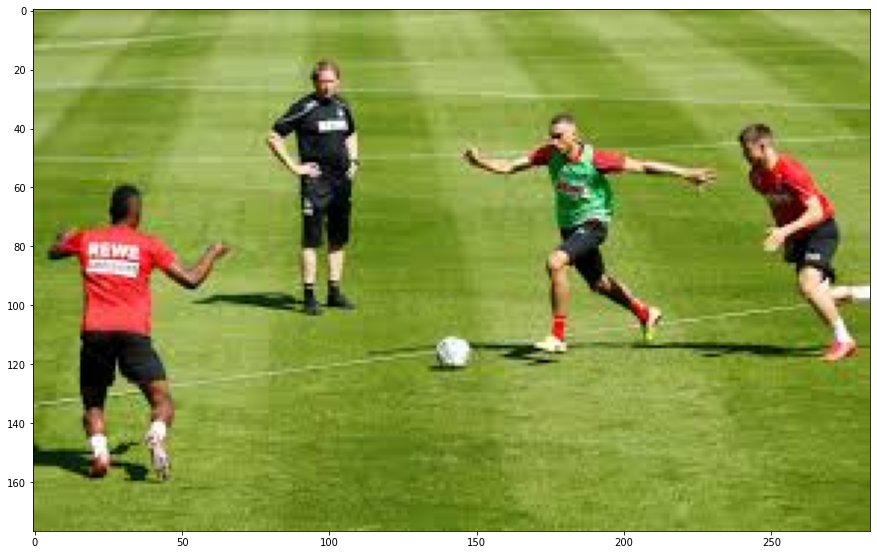

In [12]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [13]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

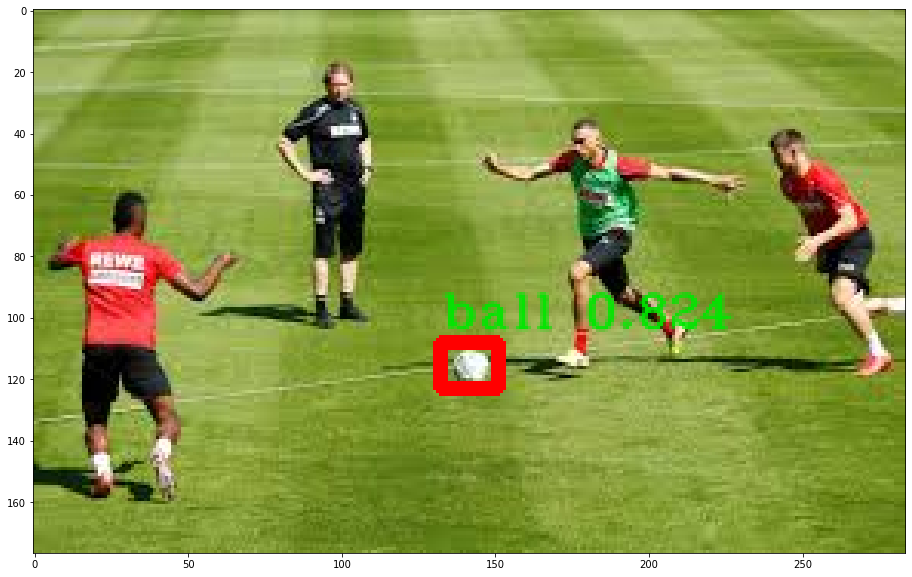

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [16]:
! pip uninstall opencv-python

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [19]:
import numpy as np
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('/content/gdrive/My Drive/Colab Notebooks/darkflow/1.mkv')
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv2.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) == ord('q'):
      break
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

AttributeError: ignored